In this notebook, we play around with using Capyldi (Capaldi?) to do bulk runs on the whereistheboom.csv dump.

In [1]:
import pandas as pd
import matplotlib as mpl
import numpy as np
import numpy.random as npr
from tqdm import tqdm
import requests
import sys

sys.path.append('../../../capyldi')
from capyldi import capyldi

%matplotlib inline

In [2]:
df = pd.read_csv('../data/telegram/whereistheboom.csv')
df.columns = [x.strip() for x in df.columns]
df['date_col'] = df.apply(lambda x: pd.to_datetime(x['date']+' '+x['time']), 1)
df = df.date_col.value_counts().reset_index()
df.columns = ['date_col', 'count_col']
df = df.sort_values('date_col')

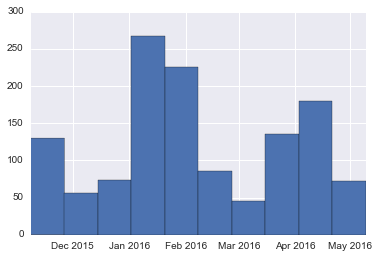

In [3]:
df.date_col.hist()

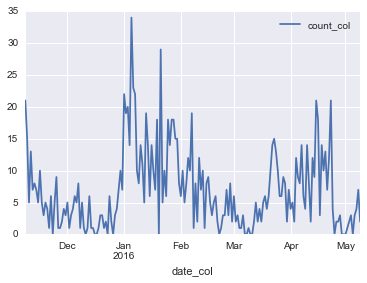

In [4]:
per_day_df = df.set_index('date_col').groupby(pd.TimeGrouper('1D')).sum().fillna(0).reset_index()
per_day_df.plot(x='date_col', y='count_col', kind='line')

---

In [5]:
results = capyldi(df, ['arima', 'mmpp', 'bcp', 'twitter_breakout'])

Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]
                                                
Analyzing:   0%|          | 0/1 [00:00<?, ?it/s]
                                                
Grouping by time interval: 100%|██████████| 11/11 [00:49<00:00,  4.47s/it]


In [6]:
import pickle
with open('results_whereistheboom.pkl', 'wb') as outfile:
    pickle.dump(results, outfile)